# Cars 4 You: Expediting Car Evaluations with Machine Learning

## Problem Statement

**Cars 4 You** is an online car resale company that buys vehicles from different brands through its platform.  
Users submit details about their cars, which are then sent for mechanic evaluation before resale.

Due to rapid growth, the company faces **delays in car inspections**, leading to loss of potential customers.  
To solve this, the company wants a **predictive model** capable of estimating the **price of a car based on user-provided inputs**, without needing a physical evaluation.

## Project Objectives

The overall project is structured into three main goals (for the final submission), but the **first deliverable** focuses on the **initial stages** of this workflow.

### 1. Regression Benchmarking
Develop a regression model that predicts car prices (`price`) using the 2020 Cars 4 You dataset.  
Implement a consistent **model assessment strategy** to compare models and select the most generalizable one.

### 2. Model Optimization
Later in the project, explore model optimization through:
- Hyperparameter tuning  
- Feature engineering and preprocessing adjustments  

Compare and discuss the performance improvements.

### 3. Additional Insights
Open-ended exploration for the final project phase (e.g., feature importance, ablation study, specialized models, deep learning).



## Dataset Description

You have access to two datasets:

- **Training Set:** Cars from the 2020 Cars 4 You database, including prices (`price`).
- **Test Set:** Same descriptive features but without prices — used for Kaggle submission.

### Variables

| Attribute | Description |
|------------|-------------|
| **carID** | Unique identifier for each car |
| **Brand** | Car brand (e.g., Ford, Toyota) |
| **model** | Car model |
| **year** | Year of registration |
| **mileage** | Distance travelled (in miles) |
| **tax** | Road tax applicable in 2020 (in £) |
| **fuelType** | Fuel type (Diesel, Petrol, Hybrid, Electric) |
| **mpg** | Miles per gallon |
| **engineSize** | Engine size in liters |
| **paintQuality%** | Mechanic’s paint and hull assessment |
| **previousOwners** | Number of previous owners |
| **hasDamage** | Boolean (True/False) — damaged or not |
| **price** | Target variable — purchase price (£) |



## FIRST DELIVERABLE — Task Overview

This initial assignment is a **preparatory milestone** for your final project.  
You will **explore, prepare, and model** the dataset to demonstrate an understanding of the full ML pipeline.

Your submission must include:

1. A **Jupyter Notebook** (or a ZIP of notebooks) with code and explanatory Markdown cells.
2. A **2-page PDF** describing your pipeline’s structure and rationale.

### Naming Convention
Homework_Group36 



## DELIVERABLE TASKS & POINT DISTRIBUTION

### 1. Data Import & Exploration — *3 points*
- Load and inspect the dataset contents.  
- Generate **descriptive statistics**.  
- Detect and describe **inconsistencies or anomalies**.  
- Perform **visual exploration** (univariate & multivariate).  
- Extract **insights** and explain your findings.


### 2. Data Cleaning & Preprocessing — *5 points*
- Identify and **handle missing values** appropriately.  
- Detect and manage **outliers**, justifying your choices.  
- Encode **categorical variables**.  
- Evaluate existing features and, if relevant, **create new ones** with explanations.  
- Apply **data scaling/normalization**, explaining why your approach fits the problem.


### 3. Feature Selection — *3 points*
- Define a **clear feature selection strategy**.  
- Use **course-approved methods** (e.g., correlation, recursive elimination, model-based).  
- Present and justify your **final feature set**.


### 4. Model Building & Performance Assessment — *4 points*
- Identify the **problem type** (regression).  
- Choose relevant **algorithms** (linear models, tree-based, etc.).  
- Define one **model assessment strategy** (e.g., holdout, k-fold cross-validation).  
- Justify the **evaluation metrics** (e.g., RMSE, MAE, R²).  
- Train **at least one model** and generate **predictions for the test set**.

💡 **Bonus:** +1 point if your team ranks in the **Top 5 on Kaggle**.



### 5. Pipeline Structure & Documentation (PDF) — *5 points*
- Provide a **schematic of your full pipeline**:
  - Data cleaning  
  - Feature preprocessing  
  - Feature selection  
  - Model training and evaluation  
- Include concise explanations of:
  - What is done  
  - To which variables  
  - Why each step is taken
- Maintain **clarity, structure, and readability** throughout.


### Total Scoring
| Component | Points |
|------------|---------|
| Data Exploration | 3 |
| Preprocessing | 5 |
| Feature Selection | 3 |
| Model Building | 4 |
| Pipeline Documentation | 5 |
| **Total** | **20 points** |
| **Bonus (Top 5 Kaggle)** | **+1** |
| **Final Grade = min(20, your points)** |  |


## Completion Checklist

| Task | Done? |
|------|-------|
| Dataset imported and explored | ☐ |
| Missing values handled | ☐ |
| Outliers addressed | ☐ |
| Categorical variables encoded | ☐ |
| Features scaled and/or engineered | ☐ |
| Feature selection strategy implemented | ☐ |
| Regression model trained | ☐ |
| Performance metrics explained | ☐ |
| Predictions generated for test set | ☐ |
| Pipeline described in PDF | ☐ |
| Kaggle submission tested | ☐ |
| Notebook clean, commented, and executable | ☐ |


## Imports

In [42]:
#general imports that we will need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)
pd.set_option('display.max_rows', None)

## Loading the data and data overview

### Data Loading

In [2]:
# this loads the train data 
train = pd.read_csv('project_data/train.csv')

In [3]:
train.head()
train.tail()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
75968,37194,Mercedes,C Class,2015.0,13498,Manual,14480.0,etrol,125.0,53.3,2.0,78.0,0.0,0.0
75969,6265,Audi,Q3,2013.0,12495,Semi-Auto,52134.0,Diesel,200.0,47.9,2.0,38.0,2.0,0.0
75970,54886,Toyota,Aygo,2017.0,8399,Automatic,11304.0,Petrol,145.0,67.0,1.0,57.0,3.0,0.0
75971,860,Audi,Q3,2015.0,12990,Manual,69072.0,iesel,125.0,60.1,2.0,74.0,2.0,0.0
75972,15795,Ford,Fiesta,2018.0,10495,Manual,16709.0,Petro,145.0,64.2,1.1,38.0,1.0,0.0


In [4]:
train.describe()

,carID,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,75973.000000,74482.000000,75973.000000,74510.000000,68069.000000,68047.000000,74457.000000,74449.000000,74423.000000,74425.0
mean,37986.000000,2017.096611,16881.889553,23004.184088,120.329078,55.152666,1.660136,64.590667,1.994580,0.0
std,21931.660338,2.208704,9736.926322,22129.788366,65.521176,16.497837,0.573462,21.021065,1.472981,0.0
min,0.000000,1970.000000,450.000000,-58540.574478,-91.121630,-43.421768,-0.103493,1.638913,-2.345650,0.0
25%,18993.000000,2016.000000,10200.000000,7423.250000,125.000000,46.300000,1.200000,47.000000,1.000000,0.0
50%,37986.000000,2017.000000,14699.000000,17300.000000,145.000000,54.300000,1.600000,65.000000,2.000000,0.0
75%,56979.000000,2019.000000,20950.000000,32427.500000,145.000000,62.800000,2.000000,82.000000,3.000000,0.0
max,75972.000000,2024.121759,159999.000000,323000.000000,580.000000,470.800000,6.600000,125.594308,6.258371,0.0


### Verify that carID can be used as index

In [5]:
train['carID'].is_unique

True

In [6]:
train['carID'].isna().any()

np.False_

### Set carID as index

In [7]:
train.set_index('carID', inplace = True)

In [8]:
train.sort_index(inplace =True)

In [9]:
train.head()

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
0,Aud,A3,2016.0,10990,Manual,57097.0,Diesel,0.0,83.1,1.6,75.0,4.0,0.0
1,Audi,A7,2017.0,22999,Semi-Auto,24337.0,diesel,150.0,55.4,3.0,31.0,0.0,0.0
2,Audi,A4,2016.0,14242,Manual,14900.0,Petrol,125.0,53.3,1.4,65.0,4.0,0.0
3,Audi,Q3,2017.0,15998,Manual,37151.0,Petrol,145.0,51.4,1.4,55.0,1.0,0.0
4,NaN,A6,2019.0,30850,Automatic,4553.0,Diesel,145.0,47.9,2.0,62.0,0.0,0.0


## Functions to be reused

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None, dropna=True):
    """
    Boxplot and histogram combined with key statistics displayed and dynamic bin calculation.

    Parameters:
    - data: pandas DataFrame
    - feature: column name to visualize
    - figsize: tuple, size of figure (default (12,7))
    - kde: whether to show density curve (default False)
    - bins: number of bins for histogram (default None — auto-calculated)
    - dropna: whether to drop NaN values before plotting (default True)
    """

    # Optionally drop NaN values
    series = data[feature].dropna() if dropna else data[feature]

    # Handle case where column might be empty
    if series.isnull().all():
        raise ValueError(f"Column '{feature}' contains only NaN values. Nothing to plot.")

    # Calculate key statistics
    mean = series.mean()
    median = series.median()
    std = series.std()
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1

    # Auto-calculate bins using Freedman–Diaconis rule if not provided
    if bins is None:
        n = len(series)
        if n > 1:
            bin_width = 2 * iqr / np.cbrt(n)
            if bin_width > 0:
                bins = int(np.ceil((series.max() - series.min()) / bin_width))
            else:
                bins = 10  # fallback if IQR=0
        else:
            bins = 10  # fallback if only one data point

    # Create figure with subplots
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize
    )

    # Boxplot
    sns.boxplot(
        x=series, ax=ax_box2, showmeans=True, color="violet"
    )

    # Histogram
    sns.histplot(
        x=series, kde=kde, ax=ax_hist2, bins=bins, color="skyblue"
    )

    # Vertical lines for key stats
    ax_hist2.axvline(mean, color="green", linestyle="--", label=f"Mean = {mean:.2f}")
    ax_hist2.axvline(median, color="black", linestyle="-", label=f"Median = {median:.2f}")
    ax_hist2.axvline(q1, color="orange", linestyle=":", label=f"Q1 = {q1:.2f}")
    ax_hist2.axvline(q3, color="red", linestyle=":", label=f"Q3 = {q3:.2f}")

    # Text annotation box with key statistics
    stats_text = (
        f"Mean: {mean:.2f}\n"
        f"Median: {median:.2f}\n"
        f"Std Dev: {std:.2f}\n"
        f"Q1: {q1:.2f}\n"
        f"Q3: {q3:.2f}\n"
        f"IQR: {iqr:.2f}\n"
        f"Bins: {bins}"
    )

    ax_hist2.text(
        0.98, 0.95, stats_text,
        transform=ax_hist2.transAxes,
        fontsize=10,
        va="top",
        ha="right",
        bbox=dict(boxstyle="round,pad=0.4", facecolor="white", alpha=0.8)
    )

    # Add legend and tidy up
    ax_hist2.legend()
    plt.tight_layout()
    plt.show()


In [11]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [12]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [13]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

## Data Import and Exploration

In [14]:
df = train.copy()

In [18]:
x_train_val, x_test, y_train_val, y_test = train_test_split(df.drop(columns=['price']), df['price'], test_size=0.2, random_state=RSEED)

In [19]:
x_train_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60778 entries, 14554 to 15795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           59582 non-null  object 
 1   model           59568 non-null  object 
 2   year            59578 non-null  float64
 3   transmission    59573 non-null  object 
 4   mileage         59606 non-null  float64
 5   fuelType        59600 non-null  object 
 6   tax             54513 non-null  float64
 7   mpg             54458 non-null  float64
 8   engineSize      59532 non-null  float64
 9   paintQuality%   59559 non-null  float64
 10  previousOwners  59522 non-null  float64
 11  hasDamage       59542 non-null  float64
dtypes: float64(8), object(4)
memory usage: 6.0+ MB


In [20]:
# let's check the data types
x_train_val.sample(10)

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
59604,Opel,Viva,2017.0,Manual,36188.0,Petrol,145.0,62.8,1.0,64.000000,0.0,0.0
36801,Mercedes,C Class,2019.0,Automatic,962.0,Petrol,145.0,28.5,4.0,3.207418,4.0,0.0
35544,Mercedes,B Class,2019.0,Semi-Auto,14140.0,PETROL,145.0,45.6,1.3,64.000000,4.0,0.0
16729,Ford,Mondeo,2019.0,Semi-Auto,33036.0,Diesel,150.0,45.6,2.0,35.000000,0.0,0.0
43702,Mercedes,C Class,2016.0,Automatic,32769.0,Diesel,NaN,NaN,2.1,86.000000,2.0,0.0
1911,Audi,A3,2015.0,Manual,NaN,Diesel,20.0,68.9,2.0,39.000000,1.0,0.0
60306,Opel,Mokka,2016.0,Manual,9400.0,Petrol,160.0,44.8,1.4,41.000000,0.0,0.0
36725,Mercedes,B Class,2014.0,Automati,29236.0,Diesel,30.0,64.2,1.5,89.000000,NaN,0.0
1127,Audi,A3,2015.0,Manual,73567.0,Diesel,0.0,83.1,1.6,80.000000,3.0,0.0


### Brand

In [21]:
# display all unique values 
x_train_val['Brand'].unique()

array(['BMW', 'W', 'Ford', 'Toyota', 'Mercedes', 'Opel', 'Skoda', 'FORD',
       'Hyundai', 'Audi', 'VW', 'toyota', 'yundai', nan, 'ford', 'For',
       'pel', 'Toyot', 'V', 'oyota', 'TOYOTA', 'mercedes', 'HYUNDAI',
       'Ope', 'MW', 'v', 'AUDI', 'OYOTA', 'ord', 'Mercede', 'BM', 'koda',
       'ercedes', 'OPEL', 'for', 'MERCEDES', 'Aud', 'audi', 'SKODA',
       'hyundai', 'udi', 'opel', 'Skod', 'UDI', 'bmw', 'Hyunda', 'skoda',
       'vw', 'HYUNDA', 'mw', 'FOR', 'OPE', 'mercede', 'ERCEDES', 'or',
       'ercede', 'TOYOT', 'MERCEDE', 'ORD', 'PEL', 'ud', 'w', 'ope',
       'KODA', 'AUD', 'hyunda', 'aud', 'skod', 'yunda', 'pe', 'kod',
       'toyot'], dtype=object)

In [46]:
# change all values to lower case
x_train_val['Brand'] = x_train_val['Brand'].str.lower().str.strip()
x_train_val['Brand'].unique()

array(['bmw', 'w', 'ford', 'toyota', 'mercedes-benz', 'opel', 'skoda',
       'hyundai', 'audi', 'volkswagen', nan, 'v'], dtype=object)

In [25]:
# Correct misspelled values in 'Brand' column
brand_corrections = {
    'aud': 'audi',
    'udi': 'audi',
    'udi': 'audi',
    'ud': 'audi',
    'mw': 'bmw',
    'bm': 'bmw',
    'for': 'ford',
    'ord': 'ford', 
    'or': 'ford',
    'hyunda': 'hyundai',
    'yundai': 'hyundai',
    'yunda': 'hyundai',
    'mercedes': 'mercedes-benz',
    'mercede': 'mercedes-benz',
    'ercedes': 'mercedes-benz',
    'ercede': 'mercedes-benz',
    'mercedes benz': 'mercedes-benz',
    'koda': 'skoda',
    'skod': 'skoda',
    'kod': 'skoda',
    'toyot': 'toyota',
    'oyota': 'toyota',
    'pel': 'opel',
    'pe': 'opel',
    'ope': 'opel',
    'vw': 'volkswagen'
}

x_train_val['Brand'] = x_train_val['Brand'].replace(brand_corrections)
x_train_val['Brand'].unique()


array(['bmw', 'w', 'ford', 'toyota', 'mercedes-benz', 'opel', 'skoda',
       'hyundai', 'audi', 'volkswagen', nan, 'v'], dtype=object)

### model

In [51]:
# Filter rows where Brand is 'v', 'w', or NaN and show unique model values in a dataframe
# mask = x_train_val['Brand'].isin(['v', 'w']) | x_train_val['Brand'].isna()
mask_w = x_train_val['Brand'].isin(['w']) 
unique_models_df = x_train_val.loc[mask_w, ['Brand', 'model']].drop_duplicates().reset_index(drop=True)
unique_models_df

,Brand,model
0,w,golf sv
1,w,golf
2,w,t-roc
3,w,tiguan
4,w,passat
5,w,polo
6,w,t-cros
7,w,shuttle
8,w,arteon
9,w,up


In [40]:
mask_v = x_train_val['Brand'].isin(['v']) 
unique_models_df = x_train_val.loc[mask_v, ['Brand', 'model']].drop_duplicates().reset_index(drop=True)
unique_models_df

,Brand,model
0,v,Scirocco
1,v,Golf
2,v,Up
3,v,Polo
4,v,Tiguan
5,v,T-Roc
6,v,Touareg
7,v,Passat
8,v,Sharan
9,v,T-Cross


In [50]:
# lowercase model
x_train_val['model'] = x_train_val['model'].str.lower().str.strip()
x_train_val['model'].unique()


array(['2 series', 'golf sv', 'b-ma', 'aygo', '3 series', 'fiesta',
       'gla class', 'corsa', 'yeti outdoor', 'focus', 'v class', 'yaris',
       'mondeo', 'c class', 'tucson', 'a4', 'insignia', 'tt', 'tiguan',
       'crossland x', 'i30', 'kuga', 'rav4', 'polo', 'passat', 'a3',
       'i20', 'i10', 'q3', 'sharan', 'glc class', 'cl class', 'fabia',
       'meriva', 'astra', 'e class', 'up', 'cls class', nan, 'ecosport',
       'golf', 'karo', 'adam', 'scirocco', 'q2', 'hilux', 'mokka',
       'touran', 'corolla', 'q5', 'kodiaq', 'focu', 'mustang', 'z4',
       'octavia', 'x5', 'gtc', 'a5', 'c-hr', 'a class', 'x1', 'edge',
       't-roc', 'arteon', 'b-max', 'a6', 'x-class', 'ka+', 'ix20', 'q',
       'mokka x', 'rs3', '1 serie', 'x7', '5 series', 'a1', 'superb',
       '1 series', 'auris', '6 series', 'a', 'karoq', 'sl class', 'cc',
       '7 series', 'kamiq', 'citigo', 'cors', 'c-max', 'x3', 'galaxy',
       'ix35', 'crossland', 'scala', 'b class', 'q7', 'verso', 'ka',
       'santa

In [43]:
mask_na = x_train_val['Brand'].isna()
unique_models_df = x_train_val.loc[mask_na, ['Brand', 'model']].drop_duplicates().reset_index(drop=True)
unique_models_df

,Brand,model
0,NaN,C Class
1,NaN,Karo
2,NaN,Q3
3,NaN,Aygo
4,NaN,Focus
5,NaN,Golf
6,NaN,Insignia
7,NaN,C Class
8,NaN,E Class
9,NaN,Polo


In [ ]:
# map the model to the Brand where Brand is v, w or na



In [ ]:
# show the different unique values in model where Brand is v, w or na


x_train_val[['Brand','model']]


,Brand,model
carID,,
14554,bmw,2 Series
72454,w,Golf SV
30216,ford,B-MA
52505,toyota,Aygo
13506,bmw,3 Series
...,...,...
37194,mercedes-benz,C Class
6265,audi,Q3
54886,toyota,Aygo


In [ ]:
# replavce the misspelled values


### year

### price

### transmission

### mileage

### fuelType

### tax

### mpg

### engineSize	

### paintQuality%

### previousOwners	

### hasDamage

# Make sure the variable types are correctly identified

# Identifier
id_vars = ["carID"]

# Categorical variables (nominal, not ordered)
cat_vars = [
    "Brand",
    "model",
    "transmission",
    "fuelType"
]

# Ordinal variables (ordered but discrete)
ord_vars = [
    "year",
    "previousOwners"
]

# Continuous numerical variables
cont_vars = [
    "mileage",
    "tax",
    "mpg",
    "engineSize",
    "paintQuality%"
]

# Boolean variables
bool_vars = [
    "hasDamage"
]

# Variable groups in a dictionary
var_types = {
    "identifier": id_vars,
    "categorical": cat_vars,
    "ordinal": ord_vars,
    "continuous": cont_vars,
    "boolean": bool_vars
}

# Display 
for k, v in var_types.items():
    print(f"{k.capitalize():<12}: {v}")

In [88]:
# convert the variable types
for col in var_types['categorical']:
    X_train_val[col] = X_train_val[col].astype('category')
    X_test[col] = X_test[col].astype('category')

for col in var_types['ordinal']:
    X_train_val[col] = X_train_val[col].astype('category')
    X_test[col] = X_test[col].astype('category')

for col in var_types['continuous']:
    X_train_val[col] = X_train_val[col].astype('float')
    X_test[col] = X_test[col].astype('float')

for col in var_types['boolean']:
    X_train_val[col] = X_train_val[col].astype('bool')
    X_test[col] = X_test[col].astype('bool')

In [91]:
X_train_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53181 entries, 43038 to 54362
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Brand           52114 non-null  category
 1   model           52142 non-null  category
 2   year            52126 non-null  category
 3   transmission    52131 non-null  category
 4   mileage         52134 non-null  float64 
 5   fuelType        52121 non-null  category
 6   tax             47686 non-null  float64 
 7   mpg             47677 non-null  float64 
 8   engineSize      52121 non-null  float64 
 9   paintQuality%   52115 non-null  float64 
 10  previousOwners  52104 non-null  category
 11  hasDamage       53181 non-null  bool    
dtypes: bool(1), category(6), float64(5)
memory usage: 2.9 MB


## Understanding the target variable

In [72]:
train['price'].isna().sum()

np.int64(0)

In [75]:
train['price'].describe()

count     75973.000000
mean      16881.889553
std        9736.926322
min         450.000000
25%       10200.000000
50%       14699.000000
75%       20950.000000
max      159999.000000
Name: price, dtype: float64

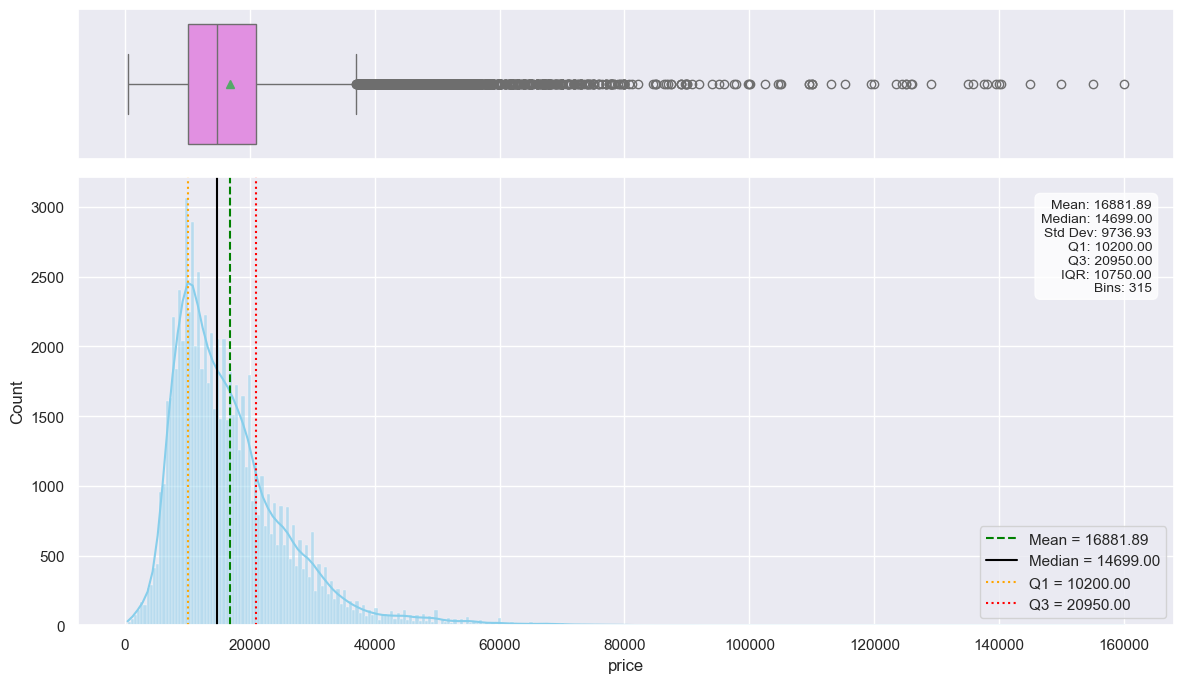

In [70]:
histogram_boxplot(df, 'price', kde=True, dropna=False)

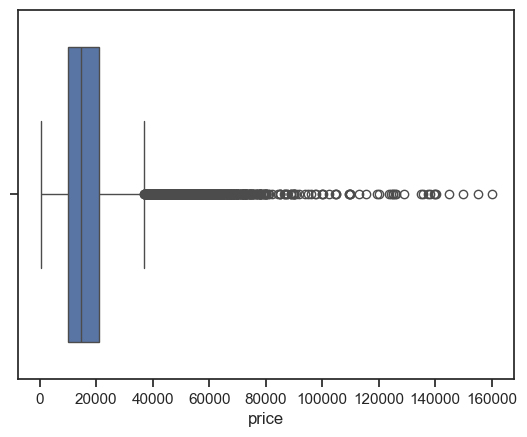

In [77]:
sns.set_style("ticks")
sns.boxplot(x = train["price"])
plt.show()

In [82]:
y = train['price']
X = train.drop(columns=['price'])

# stratify by bins helps to mantain the distribution between train and val data, used log because price is very skewed
y_bins = pd.qcut(np.log1p(y), q=10, duplicates='drop')

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y,
                                            test_size=0.30,
                                            stratify=y_bins,
                                            random_state=42)

#random_state mantains the same exact distribution, so train and val will always have the same observations (every time you run this code)(42 its just a random number, could be anything) 

In [83]:
X_train_val

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
43038,Mercedes,A Class,2018.0,Automatic,6731.0,Petrol,145.0,53.3,1.3,80.0,4.0,0.0
52694,Toyota,Corolla,2019.0,Automatic,3988.0,Hybrid,135.0,72.4,2.0,57.0,3.0,0.0
4950,Aud,A3,2016.0,Semi-Auto,14298.0,Petrol,30.0,58.9,1.4,73.0,2.0,0.0
61621,Opel,Corsa,2018.0,Manual,8857.0,Petrol,NaN,55.4,1.4,63.0,3.0,0.0
51944,Toyot,Yaris,2017.0,unknown,28977.0,Petrol,30.0,55.0,1.3,91.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13867,BMW,1 Series,2017.0,Manual,28133.0,Diesel,145.0,65.7,2.0,63.0,0.0,0.0
32584,Hyundai,I20,2019.0,MANUAL,4000.0,Petrol,145.0,46.3,1.2,37.0,1.0,0.0
32354,Hyundai,I10,2018.0,Manua,31375.0,Petrol,150.0,60.1,1.0,55.0,NaN,0.0


# **Data exploration**

# Numerical variables

In [20]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,52126.0,2017.098261,2.222058,1970.000000,2016.00,2017.0,2019.0,2024.121759
mileage,52134.0,22940.901586,22091.150878,-58540.574478,7441.25,17251.0,32359.5,323000.000000
tax,47686.0,120.437746,65.477467,-91.121630,125.00,145.0,145.0,580.000000
mpg,47677.0,55.068870,16.419273,-43.421768,46.30,54.3,62.8,470.800000
engineSize,52121.0,1.659101,0.573329,-0.103493,1.20,1.6,2.0,6.200000
paintQuality%,52115.0,64.711656,21.038080,1.638913,47.00,65.0,82.0,125.594308
previousOwners,52104.0,1.993726,1.473086,-2.345650,1.00,2.0,3.0,6.258371
hasDamage,52068.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000


- **Count is different in every variable (because of nan values)** — figure out what to do to nan values
- ***hasDamage* as only 0's** — delete the variable because is useless
- ***previousOwners* has negative values and max values is not int** — figure out what to do to negative and non int values
- **Max value of *paintQuality* is above 100%** — not sure if its supposed to
- ***engineSize* has negative values** — try to understand why and what do to abt it
- ***mpg (miles per gallon)* has negative values** — try to understand why and what do to abt it
- ***tax* has negative values** — try to understand why
- ***mileage* has negative values** — try to understand why
- ***years* seems fine** — maybe evaluate if non int values make sense

### nan values count

In [17]:
X_train.isna().sum()

Brand             1067
model             1039
year              1055
transmission      1050
mileage           1047
fuelType          1060
tax               5495
mpg               5504
engineSize        1060
paintQuality%     1066
previousOwners    1077
hasDamage         1113
dtype: int64

## Numerical Variables more in dept:

### *—previousOwners—*

there's like 600 observations with non int values

In [18]:
X_train['previousOwners'].unique()

array([ 4.        ,  3.        ,  2.        ,  1.        ,  0.        ,
        6.25823052, -2.33936045,         nan, -2.29943868, -2.31225953,
        6.23308217,  6.24177863,  6.25837066, -2.34030622, -2.33744529,
       -2.34565   ,  6.24583495,  6.23017958,  6.21772443,  6.22789796,
       -2.31733109, -2.33512284, -2.34010209,  6.2482512 ])

In [19]:
#X_train.loc[train['previousOwners'] > (4), ['previousOwners']]
train.loc[train['previousOwners'] < (0), ['previousOwners']]

,previousOwners
carID,
213,-2.335123
230,-2.335123
479,-2.335123
547,-2.335123
632,-2.335123
...,...
75498,-2.345650
75542,-2.345650
75549,-2.345650


### *— paintQuality% —*

1565 weird values, 1066 of them are nan

In [20]:
X_train['paintQuality%'].unique()

array([ 80.        ,  57.        ,  73.        ,  63.        ,
        91.        ,  68.        ,  88.        ,  75.        ,
        87.        ,  35.        ,  95.        ,  94.        ,
        84.        ,  85.        ,  99.        ,  38.        ,
        89.        ,  71.        ,  45.        ,  49.        ,
        42.        ,  78.        ,  37.        ,  62.        ,
        66.        ,  74.        ,  98.        ,  54.        ,
                nan,  40.        ,  34.        ,  97.        ,
        90.        ,  59.        ,  33.        ,  61.        ,
        44.        ,  55.        ,  81.        ,  48.        ,
        46.        ,  32.        ,  77.        ,  70.        ,
        41.        ,  79.        ,  53.        ,  76.        ,
        39.        ,  65.        ,  60.        ,  92.        ,
         3.1152953 ,  47.        ,  51.        ,  67.        ,
        36.        ,  96.        ,  31.        ,  56.        ,
        64.        ,  83.        ,  72.        ,  82.  

In [21]:
X_train.loc[train['paintQuality%'] != round(train['paintQuality%']), ['paintQuality%']]

,paintQuality%
carID,
75078,NaN
48391,NaN
1249,3.115295
33913,NaN
42991,125.202033
...,...
75527,NaN
66160,NaN
43845,NaN


### *— engineSize —*

Only a few rows of negative values

In [22]:
X_train.loc[train['engineSize'] < (0), ['engineSize']]

,engineSize
carID,
23710,-0.103493
18906,-0.103493
25300,-0.103493
24064,-0.103493
22182,-0.103493
24953,-0.103493
15255,-0.103493
15972,-0.103493
29674,-0.103493


### *—mpg—*

The negative observations value is always "-43.42176751" and theres only a few of them

In [23]:
X_train['mpg'].unique()

array([ 53.3       ,  72.4       ,  58.9       ,  55.4       ,
        55.        ,  67.3       ,  61.4       ,  43.5       ,
        48.7       ,  41.5       ,  70.6       ,  65.7       ,
        60.1       ,  47.1       ,  54.3       ,  68.9       ,
        52.3       ,  40.4       ,  37.2       ,  74.3       ,
        57.7       ,  83.1       ,          nan,  69.        ,
        46.3       ,  45.6       ,  44.1       ,  49.6       ,
        40.9       ,  25.4       ,  64.2       ,  38.2       ,
        39.8       ,  50.4       ,  62.8       ,  56.5       ,
        42.8       ,  39.2       ,  30.4       ,  42.2       ,
        78.5       ,  66.        ,  35.3       ,  33.6       ,
        38.7       ,  51.4       ,  34.        ,  33.2       ,
        44.8       ,  47.9       ,  65.6       ,  36.2       ,
        78.4       ,  89.77369267,  32.8       ,  51.1       ,
        76.4       ,  42.16      ,  36.7       ,   9.42917895,
        61.7       ,  37.7       ,  92.11045521,  32.5 

In [24]:
X_train.loc[train['mpg'] < (0), ['mpg']]

,mpg
carID,
8314,-43.421768
9202,-43.421768
14420,-43.421768
13723,-43.421768
7781,-43.421768
14127,-43.421768
14767,-43.421768
13134,-43.421768
12026,-43.421768


### *— tax —*

There's 262 negative values

In [25]:
X_train['tax'].unique()

array([145.        , 135.        ,  30.        ,          nan,
         0.        , 125.        , 150.        ,  20.        ,
       200.        , 240.        , 300.        , 160.        ,
       260.        , 165.        , -45.78061049, 140.        ,
       265.        , 195.        , 235.        , 205.        ,
       305.        , 316.48718937, -31.91494466, 303.14889146,
       -43.24208237, 120.        , -49.15354066, 330.        ,
       316.29630636, 325.        , 570.        , 290.        ,
       -20.24107949, 580.        , -91.12163048, 155.        ,
       -60.6840948 , 294.84340933, 277.38425448, -56.19320154,
       555.        , 115.        , 299.47350391, 185.        ,
       565.        ,  10.        , 290.48678508, 255.        ,
       326.02823317, 327.91577835, 270.        , 190.        ,
       -18.33074314, 280.        , 230.        , 520.        ,
       315.        , 245.        , 220.        , 110.        ,
       535.        , 210.        , 540.        , 250.  

In [26]:
X_train.loc[train['tax'] < (0), ['tax']]

,tax
carID,
28716,-45.780610
31534,-31.914945
14457,-43.242082
69153,-49.153541
64445,-20.241079
...,...
41356,-56.193202
62361,-20.241079
5290,-60.684095


### *— mileage —*

There's 271 negative values

In [27]:
X_train.loc[train['mileage'] < (0), ['mileage']]

,mileage
carID,
46106,-50755.210230
14743,-58540.574478
61235,-42707.564215
41798,-50755.210230
52966,-39765.602338
...,...
39049,-50755.210230
70374,-48190.655673
55841,-42707.564215


# Categorical variables

In [28]:
X_train.describe(include = 'object').T

,count,unique,top,freq
Brand,52114,72,Ford,10347
model,52142,688,Focus,4412
transmission,52131,40,Manual,26663
fuelType,52121,33,Petrol,26681


- **Count is different (nan values)**

## Categorical variables more in dept:

Misspelling, spaces and uppercase/lowercase are problems (also nan)

In [29]:
X_train['Brand'].unique()

array(['Mercedes', 'Toyota', 'Aud', 'Opel', 'Toyot', nan, 'ercedes', 'vw',
       'Ford', 'Audi', 'BMW', 'VW', 'V', 'Skoda', 'udi', 'Hyundai', 'bmw',
       'AUDI', 'W', 'Hyunda', 'ford', 'ORD', 'BM', 'opel', 'HYUNDAI',
       'OPEL', 'FORD', 'Skod', 'MW', 'MERCEDES', 'For', 'ord', 'Mercede',
       'TOYOTA', 'toyota', 'Ope', 'audi', 'oyota', 'mercedes', 'pel',
       'SKODA', 'yundai', 'koda', 'skoda', 'for', 'hyundai', 'mw',
       'mercede', 'SKOD', 'OPE', 'ercede', 'hyunda', 'kod', 'OYOTA', 'ud',
       'FOR', 'ope', 'ERCEDES', 'or', 'v', 'w', 'aud', 'pe', 'PEL',
       'skod', 'yunda', 'UDI', 'HYUNDA', 'KODA', 'toyot', 'AUD',
       'MERCEDE', 'TOYOT'], dtype=object)

In [30]:
X_train['model'].unique()

array([' A Class', ' Corolla', ' A3', ' Corsa', ' Yaris', ' Mondeo',
       ' E Class', ' TIGUAN', ' FOCUS', ' Grandland X', ' Fiest',
       ' 2 Series', ' Fiesta', ' A', ' C CLASS', ' Focus', ' Polo',
       ' Golf', ' Tiguan', ' GLS Class', ' Fabia', ' Astra', ' golf',
       ' C Class', ' Mokka X', ' c-max', ' Aygo', ' T-ROC', 'Focus',
       ' 3 series', ' X5', ' Caddy Maxi Life', ' X3', ' Citigo', ' C-HR',
       ' V Class', ' CL Class', ' A5', ' I10', ' X1', ' Viva', ' Touareg',
       ' Up', ' A4', ' X2', ' Superb', ' Q5', ' a3', ' GLC Class',
       ' Kuga', ' 5 Series', ' A CLASS', ' Passat', ' Octavia', ' A8',
       ' I40', ' SLK', nan, ' GLE Class', ' EcoSport', ' B-MAX', ' Q2',
       ' E CLASS', ' Q3', ' 3 Series', ' RS3', ' Yeti Outdoor',
       ' Santa Fe', ' A6', ' Avensis', ' GLA Class', ' SL CLASS',
       ' Santa F', 'Kuga', ' California', 'Astra', 'Fiesta', ' Karoq',
       ' 4 Series', ' A1', ' 1 Series', ' Auris', ' GT86', ' I30',
       ' Sharan', 'Zafira', ' B

In [31]:
X_train['transmission'].unique()

array(['Automatic', 'Semi-Auto', 'Manual', 'unknown', 'anual', 'manual',
       ' Manual ', 'emi-Auto', nan, 'Automati', 'utomatic', 'MANUAL',
       'Other', 'Manua', 'semi-auto', 'automatic', ' MANUAL ',
       'AUTOMATIC', 'anua', 'SEMI-AUTO', 'Semi-Aut', 'AUTOMATI',
       'automati', ' Manual', 'utomati', 'nknown', 'semi-aut', 'UTOMATIC',
       'ANUAL', 'Manual ', 'unknow', 'manual ', ' manual ', 'MANUA',
       'UNKNOWN', 'SEMI-AUT', 'nknow', 'emi-auto', 'EMI-AUTO', 'manua',
       'emi-Aut'], dtype=object)

In [32]:
X_train['fuelType'].unique()

array(['Petrol', 'Hybrid', 'DIESEL', 'Diesel', 'Other', 'petrol', nan,
       'PETROL', 'Petro', 'etrol', 'iesel', 'Diese', 'diesel', 'OTHER',
       'etro', 'Othe', 'YBRID', 'ETROL', 'ybrid', 'PETRO', 'hybrid',
       'ther', 'Hybri', 'diese', 'IESEL', 'HYBRID', 'Electric', 'petro',
       'iese', 'DIESE', 'ybri', 'HYBRI', 'ETRO', 'other'], dtype=object)

##### With *"train['carID'].is_unique"* done above, we saw that every carID was different so we should assume that the duplicates are actually different cars

In [33]:
X_train.duplicated().sum()

np.int64(5)